The average amount spent on TV advertising is: $147.04

The correlation between radio advertising expenditure and product sales is: 0.35

The advertising medium with the highest impact on sales is: TV



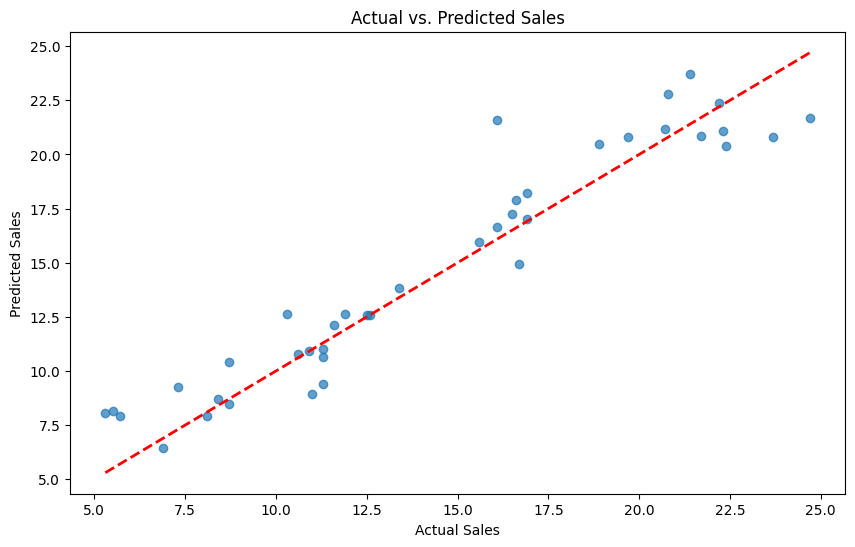

Predicted sales for $200 on TV, $40 on Radio, and $50 on Newspaper: 19.87 units

Model score on normalized data: 0.91

Model score when only Radio and Newspaper are used as predictors: 0.11


In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = r"C:\Users\nikhi\Downloads\MLResearch\MLResearch\Sales Prediction Dataset\advertising_sales_data.xlsx"  # or use forward slashes
df = pd.read_excel(file_path, sheet_name='original')

# Handle missing values by filling them with the mean of their respective columns
df = df.fillna(df.mean())

# 1. What is the average amount spent on TV advertising in the dataset?
average_tv_ad_spend = df['TV'].mean()
print(f"The average amount spent on TV advertising is: ${average_tv_ad_spend:.2f}\n")

# 2. What is the correlation between radio advertising expenditure and product sales?
correlation_radio_sales = df['Radio'].corr(df['Sales'])
print(f"The correlation between radio advertising expenditure and product sales is: {correlation_radio_sales:.2f}\n")

# 3. Which advertising medium has the highest impact on sales based on the dataset?
correlations = df.corr()['Sales'].drop('Sales')
highest_impact_medium = correlations.abs().idxmax()
print(f"The advertising medium with the highest impact on sales is: {highest_impact_medium}\n")

# 4. Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.
# Define features (X) and target (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the model's predictions against the actual sales values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

# 5. How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?
new_data = pd.DataFrame({'TV': [200], 'Radio': [40], 'Newspaper': [50]})
predicted_sales = model.predict(new_data)
print(f"Predicted sales for $200 on TV, $40 on Radio, and $50 on Newspaper: {predicted_sales[0]:.2f} units\n")

# 6. How does the performance of the linear regression model change when the dataset is normalized?
# Normalize the dataset
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the normalized data into training and testing sets
X_train_normalized, X_test_normalized, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train a new linear regression model on the normalized data
model_normalized = LinearRegression()
model_normalized.fit(X_train_normalized, y_train)

# Evaluate the performance of the model on the normalized test data
score_normalized = model_normalized.score(X_test_normalized, y_test)
print(f"Model score on normalized data: {score_normalized:.2f}\n")

# 7. What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?
# Define features (X) and target (y)
X_radio_newspaper = df[['Radio', 'Newspaper']]
y = df['Sales']

# Split data into training and testing sets
X_train_radio_newspaper, X_test_radio_newspaper, y_train, y_test = train_test_split(X_radio_newspaper, y, test_size=0.2, random_state=42)

# Train the linear regression model
model_radio_newspaper = LinearRegression()
model_radio_newspaper.fit(X_train_radio_newspaper, y_train)

# Evaluate the performance of the model on the test data
score_radio_newspaper = model_radio_newspaper.score(X_test_radio_newspaper, y_test)
print(f"Model score when only Radio and Newspaper are used as predictors: {score_radio_newspaper:.2f}")
